In [89]:
from lacbox.io import load_pwr, load_ind, load_inds
from lacbox.test import test_data_path
import matplotlib as mpl
import matplotlib.pyplot as plt
from pathlib import Path
import numpy as np
import matplotlib.cm as cm

In [90]:
# functions

def compute_chord(radius, alpha, TSR, B):
    # equation A
    # compute normalized chord
    Cl = (2*np.pi)**2 /360 * alpha + 0.452
    norm_c = 16*np.pi/9 * (1 / (Cl * TSR**2 * B)) * 1/(radius/R)

    return norm_c

def compute_theta(radius, alpha, TSR, B):
    # equation B
    theta = 2/3 * (1/TSR* 1/(radius/R)) - np.deg2rad(alpha)

    return np.array(np.rad2deg(theta))

In [91]:
# data
TSR = 8
B = 3
r = 1
R = 89.17
R_first = 0.2*R         # check value
alpha = 5

radius = np.linspace(R_first, R, num=20)

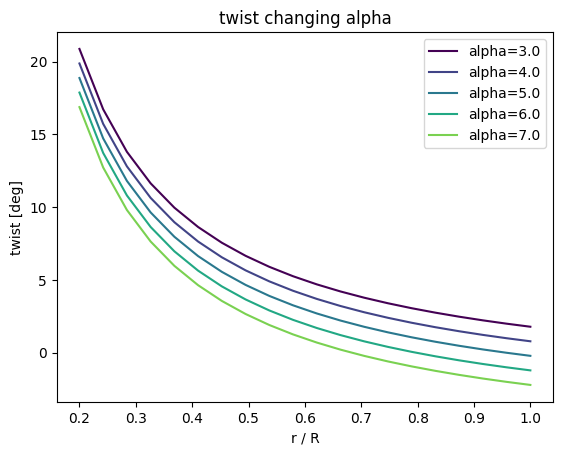

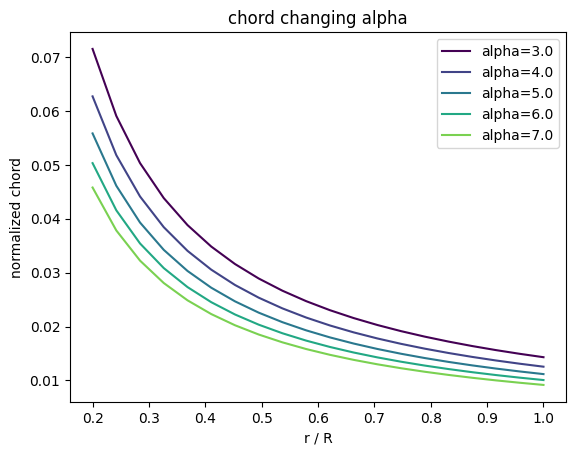

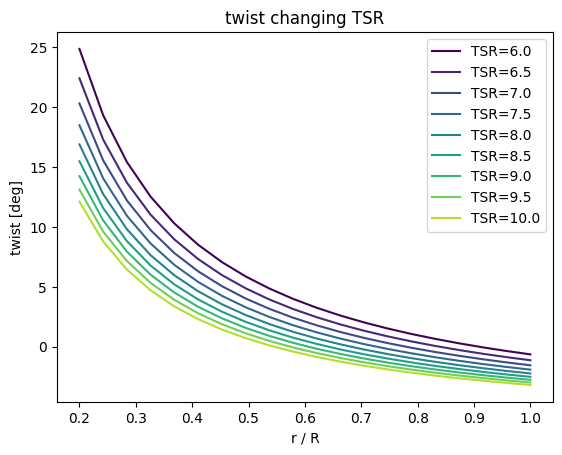

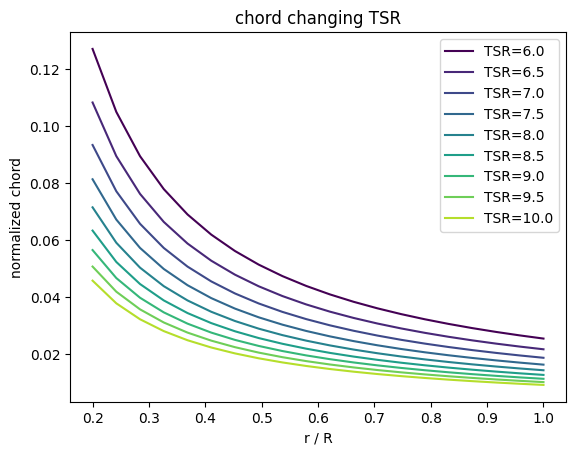

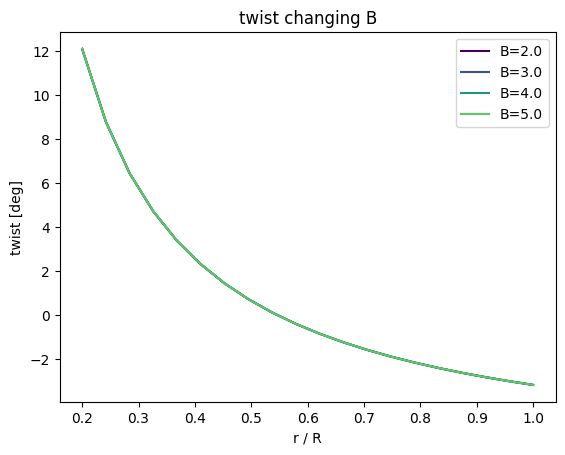

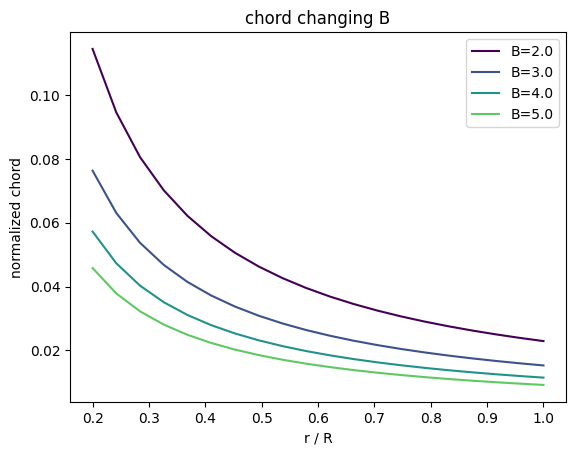

In [92]:
# assignment 01

alpha_array = np.linspace(3,7,num=5)
TSR_array = np.linspace(6,10,num=9)
B_array = np.linspace(2,5,num=4)

theta_matrix_alpha = np.zeros((len(alpha_array), len(radius)))
theta_matrix_TSR = np.zeros((len(TSR_array), len(radius)))
theta_matrix_B = np.zeros((len(TSR_array), len(radius)))
chord_matrix_alpha = np.zeros((len(alpha_array), len(radius)))
chord_matrix_TSR = np.zeros((len(TSR_array), len(radius)))
chord_matrix_B = np.zeros((len(B_array), len(radius)))


i = 0
for alpha in alpha_array:
    theta_matrix_alpha[i] =  compute_theta(radius, alpha, TSR, B)
    i += 1

i = 0
for TSR in TSR_array:
    theta_matrix_TSR[i] =  compute_theta(radius, alpha, TSR, B)
    i += 1

i = 0
for B in B_array:
    theta_matrix_B[i] = compute_theta(radius, alpha, TSR, B)
    i += 1

i = 0
for alpha in alpha_array:
    chord_matrix_alpha[i] = compute_chord(radius, alpha, TSR, B)
    i += 1

i = 0
for TSR in TSR_array:
    chord_matrix_TSR[i] = compute_chord(radius, alpha, TSR, B)
    i += 1

i = 0
for B in B_array:
    chord_matrix_B[i] = compute_chord(radius, alpha, TSR, B)
    i += 1


cmap = plt.get_cmap('viridis')

plt.figure()
plt.title('twist changing alpha')
for i in range(len(alpha_array)): 
    line_color = cmap(i/len(alpha_array-1))
    plt.plot(radius/R,theta_matrix_alpha[i,:], label=f'alpha={alpha_array[i]}', color=line_color)
plt.legend()
plt.xlabel('r / R')
plt.ylabel('twist [deg]')
plt.show()


plt.figure()
plt.title('chord changing alpha')
for i in range(len(alpha_array)): 
    line_color = cmap(i/len(alpha_array-1))
    plt.plot(radius/R,chord_matrix_alpha[i,:], label=f'alpha={alpha_array[i]}', color=line_color)
plt.legend()
plt.xlabel('r / R')
plt.ylabel('normalized chord')
plt.show()


plt.figure()
plt.title('twist changing TSR')
for i in range(len(TSR_array)): 
    line_color = cmap(i/len(TSR_array-1))
    plt.plot(radius/R,theta_matrix_TSR[i,:], label=f'TSR={TSR_array[i]}', color=line_color)
plt.legend()
plt.xlabel('r / R')
plt.ylabel('twist [deg]')
plt.show()


plt.figure()
plt.title('chord changing TSR')
for i in range(len(TSR_array)): 
    line_color = cmap(i/len(TSR_array-1))
    plt.plot(radius/R,chord_matrix_TSR[i,:], label=f'TSR={TSR_array[i]}', color=line_color)
plt.legend()
plt.xlabel('r / R')
plt.ylabel('normalized chord')
plt.show()

plt.figure()
plt.title('twist changing B')
for i in range(len(B_array)): 
    line_color = cmap(i/len(B_array-1))
    plt.plot(radius/R,theta_matrix_B[i,:], label=f'B={B_array[i]}', color=line_color)
plt.legend()
plt.xlabel('r / R')
plt.ylabel('twist [deg]')
plt.show()

plt.figure()
plt.title('chord changing B')
for i in range(len(B_array)): 
    line_color = cmap(i/len(B_array-1))
    plt.plot(radius/R,chord_matrix_B[i,:], label=f'B={B_array[i]}', color=line_color)
plt.legend()
plt.xlabel('r / R')
plt.ylabel('normalized chord')
plt.show()

C:\Users\mathe\AppData\Local\Temp\ipykernel_35012\4163516338.py:28: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout(rect=[0, 0, 1, 0.85])


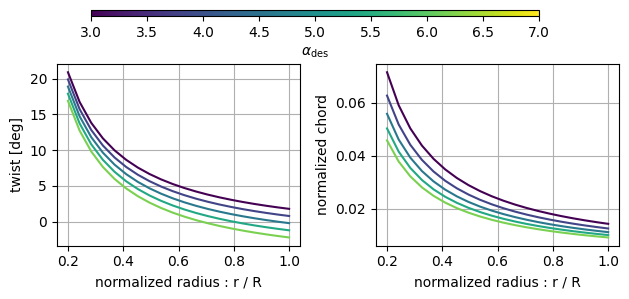

C:\Users\mathe\AppData\Local\Temp\ipykernel_35012\4163516338.py:64: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout(rect=[0, 0, 1, 0.85])


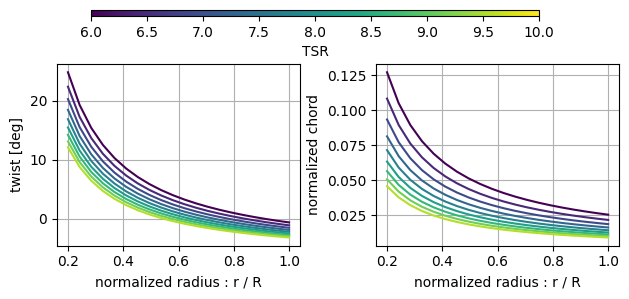

C:\Users\mathe\AppData\Local\Temp\ipykernel_35012\4163516338.py:102: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout(rect=[0, 0, 1, 0.85])


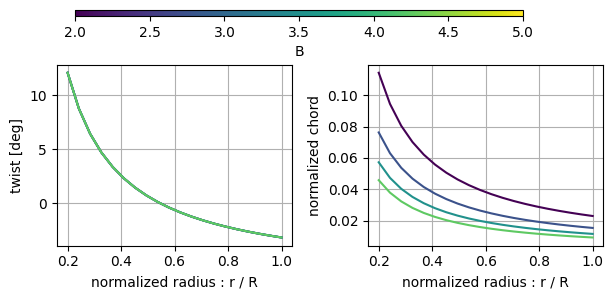

In [93]:
# initialize the figure
fig, axs = plt.subplots(1, 2, figsize=(6.4, 3))

# choose our colormap
cmap = plt.get_cmap('viridis')


#plt.title('twist changing alpha')
for i in range(len(alpha_array)): 
    line_color = cmap(i/len(alpha_array-1))
    axs[0].plot(radius/R,theta_matrix_alpha[i,:],label=f'alpha={alpha_array[i]}', color=line_color)
#plt.title('chord changing alpha')

    axs[1].plot(radius/R,chord_matrix_alpha[i,:], label=f'alpha={alpha_array[i]}', color=line_color)
axs[1].set(xlabel="normalized radius : r / R",ylabel='normalized chord')
axs[0].set(xlabel="normalized radius : r / R",ylabel='twist [deg]')


for ax in fig.get_axes():
    ax.grid()

# plt.colorbar(location='top', orientation='horizontal')
cax = fig.add_axes([0.15, 0.96, 0.7, 0.02])
norm = mpl.colors.Normalize(vmin=3, vmax=7)
fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap),
             cax=cax, orientation='horizontal', label=r'$\alpha_{\mathrm{des}}$')

fig.tight_layout(rect=[0, 0, 1, 0.85])
plt.show()


# initialize the figure
fig, axs = plt.subplots(1, 2, figsize=(6.4, 3))

# choose our colormap
cmap = plt.get_cmap('viridis')

#plt.title('twist changing TSR')
for i in range(len(TSR_array)): 
    line_color = cmap(i/len(TSR_array-1))
    axs[0].plot(radius/R,theta_matrix_TSR[i,:], label=f'TSR={TSR_array[i]}', color=line_color)
axs[0].set(xlabel="normalized radius : r / R",ylabel='twist [deg]')




#plt.title('chord changing TSR')
for i in range(len(TSR_array)): 
    line_color = cmap(i/len(TSR_array-1))
    axs[1].plot(radius/R,chord_matrix_TSR[i,:], label=f'TSR={TSR_array[i]}', color=line_color)


axs[1].set(xlabel="normalized radius : r / R",ylabel='normalized chord')

for ax in fig.get_axes():
    ax.grid()

# plt.colorbar(location='top', orientation='horizontal')
cax = fig.add_axes([0.15, 0.96, 0.7, 0.02])
norm = mpl.colors.Normalize(vmin=6, vmax=10)
fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap),
             cax=cax, orientation='horizontal', label='TSR')

fig.tight_layout(rect=[0, 0, 1, 0.85])
plt.show()


# initialize the figure
fig, axs = plt.subplots(1, 2, figsize=(6.4, 3))

# choose our colormap
cmap = plt.get_cmap('viridis')

#plt.title('twist changing B')
for i in range(len(B_array)): 
    line_color = cmap(i/len(B_array-1))
    axs[0].plot(radius/R,theta_matrix_B[i,:], label=f'B={B_array[i]}', color=line_color)


axs[0].set(xlabel="normalized radius : r / R",ylabel='twist [deg]')



#plt.title('chord changing B')
for i in range(len(B_array)): 
    line_color = cmap(i/len(B_array-1))
    axs[1].plot(radius/R,chord_matrix_B[i,:], label=f'B={B_array[i]}', color=line_color)


axs[1].set(xlabel="normalized radius : r / R",ylabel='normalized chord')


for ax in fig.get_axes():
    ax.grid()

# plt.colorbar(location='top', orientation='horizontal')
cax = fig.add_axes([0.15, 0.96, 0.7, 0.02])
norm = mpl.colors.Normalize(vmin=2, vmax=5)
fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap),
             cax=cax, orientation='horizontal', label='B')

fig.tight_layout(rect=[0, 0, 1, 0.85])
plt.show()

C:\Users\mathe\AppData\Local\Temp\ipykernel_35012\3442742295.py:25: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout(rect=[0, 0, 1, 0.85])


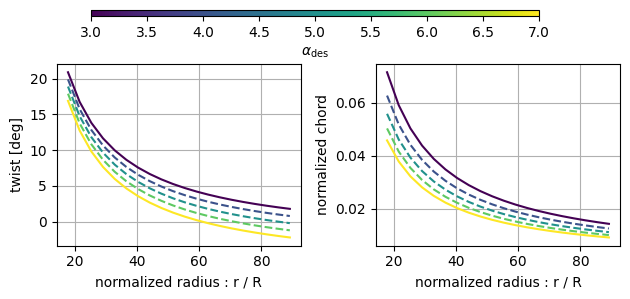

C:\Users\mathe\AppData\Local\Temp\ipykernel_35012\3442742295.py:51: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout(rect=[0, 0, 1, 0.85])


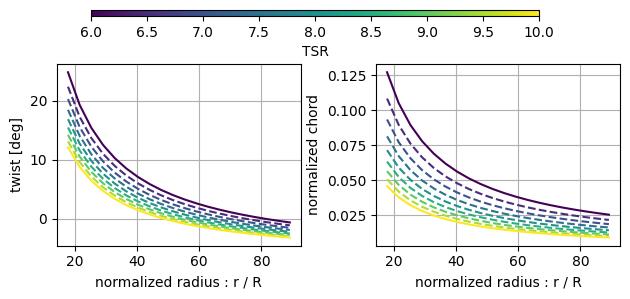

C:\Users\mathe\AppData\Local\Temp\ipykernel_35012\3442742295.py:77: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout(rect=[0, 0, 1, 0.85])


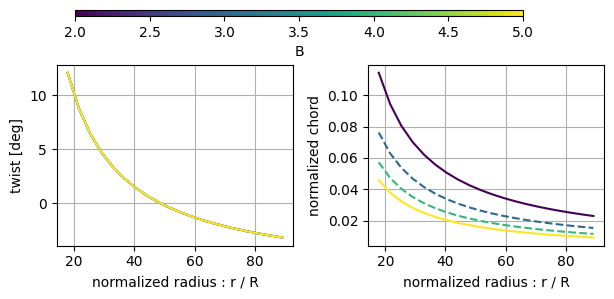

In [105]:
# 1. Plot with α array
fig, axs = plt.subplots(1, 2, figsize=(6.4, 3))

# Colormap and normalization
cmap = plt.get_cmap('viridis')
norm_alpha = mpl.colors.Normalize(vmin=min(alpha_array), vmax=max(alpha_array))

# Plotting twist and chord, changing alpha
for i in range(len(alpha_array)): 
    line_color = cmap(norm_alpha(alpha_array[i]))  # Normalized color
    linestyle = '-' if i == 0 or i == len(alpha_array) - 1 else '--'  # Solid for first and last, dashed otherwise
    axs[0].plot(radius, theta_matrix_alpha[i, :], label=f'alpha={alpha_array[i]}', color=line_color, linestyle=linestyle)
    axs[1].plot(radius, chord_matrix_alpha[i, :], label=f'alpha={alpha_array[i]}', color=line_color, linestyle=linestyle)

axs[1].set(xlabel="normalized radius : r / R", ylabel='normalized chord')
axs[0].set(xlabel="normalized radius : r / R", ylabel='twist [deg]')

for ax in fig.get_axes():
    ax.grid()

# Add a colorbar for alpha
cax = fig.add_axes([0.15, 0.96, 0.7, 0.02])  # Adjust position
fig.colorbar(mpl.cm.ScalarMappable(norm=norm_alpha, cmap=cmap), cax=cax, orientation='horizontal', label=r'$\alpha_{\mathrm{des}}$')

fig.tight_layout(rect=[0, 0, 1, 0.85])
plt.show()

# 2. Plot with TSR array
fig, axs = plt.subplots(1, 2, figsize=(6.4, 3))

# Normalization for TSR
norm_TSR = mpl.colors.Normalize(vmin=min(TSR_array), vmax=max(TSR_array))

# Plotting twist and chord, changing TSR
for i in range(len(TSR_array)): 
    line_color = cmap(norm_TSR(TSR_array[i]))  # Normalized color
    linestyle = '-' if i == 0 or i == len(TSR_array) - 1 else '--'  # Solid for first and last, dashed otherwise
    axs[0].plot(radius, theta_matrix_TSR[i, :], label=f'TSR={TSR_array[i]}', color=line_color, linestyle=linestyle)
    axs[1].plot(radius, chord_matrix_TSR[i, :], label=f'TSR={TSR_array[i]}', color=line_color, linestyle=linestyle)

axs[0].set(xlabel="normalized radius : r / R", ylabel='twist [deg]')
axs[1].set(xlabel="normalized radius : r / R", ylabel='normalized chord')

for ax in fig.get_axes():
    ax.grid()

# Add a colorbar for TSR
cax = fig.add_axes([0.15, 0.96, 0.7, 0.02])
fig.colorbar(mpl.cm.ScalarMappable(norm=norm_TSR, cmap=cmap), cax=cax, orientation='horizontal', label='TSR')

fig.tight_layout(rect=[0, 0, 1, 0.85])
plt.show()

# 3. Plot with B array
fig, axs = plt.subplots(1, 2, figsize=(6.4, 3))

# Normalization for B
norm_B = mpl.colors.Normalize(vmin=min(B_array), vmax=max(B_array))

# Plotting twist and chord, changing B
for i in range(len(B_array)): 
    line_color = cmap(norm_B(B_array[i]))  # Normalized color
    linestyle = '-' if i == 0 or i == len(B_array) - 1 else '--'  # Solid for first and last, dashed otherwise
    axs[0].plot(radius, theta_matrix_B[i, :], label=f'B={B_array[i]}', color=line_color, linestyle=linestyle)
    axs[1].plot(radius, chord_matrix_B[i, :], label=f'B={B_array[i]}', color=line_color, linestyle=linestyle)

axs[0].set(xlabel="normalized radius : r / R", ylabel='twist [deg]')
axs[1].set(xlabel="normalized radius : r / R", ylabel='normalized chord')

for ax in fig.get_axes():
    ax.grid()

# Add a colorbar for B
cax = fig.add_axes([0.15, 0.96, 0.7, 0.02])
fig.colorbar(mpl.cm.ScalarMappable(norm=norm_B, cmap=cmap), cax=cax, orientation='horizontal', label='B')

fig.tight_layout(rect=[0, 0, 1, 0.85])

plt.show()



In [95]:
V_rated_X = 11.4 # m/s
I_rated_X = 0.16

R_X = 89.17 # m

#New Class IIIB
I_rated_Y = 0.14

C = (1 + 2*I_rated_X)/(1 + 2*I_rated_Y)
V_rated_Y = C**(13/9)* V_rated_X
R_Y = R_X * C**(1/3) * V_rated_X**(4/9)

print('V new', V_rated_Y)
print('R new', R_Y)


V new 11.918136396131217
R new 265.71061829362196


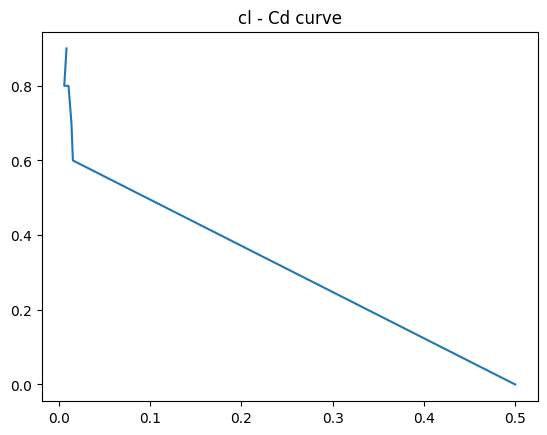

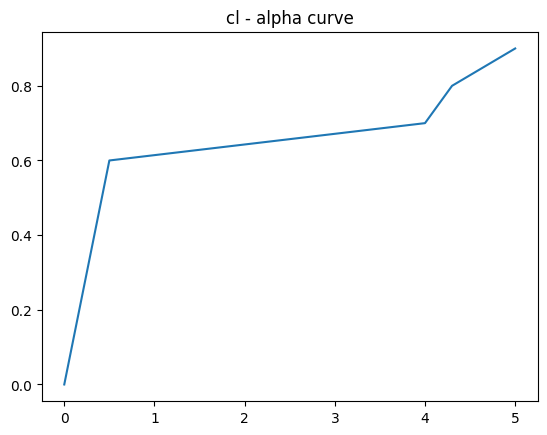

In [96]:
tc = [0, 15, 18, 24, 30, 36, 100, 105]
cl = np.array([0.9, 0.9, 0.8, 0.8, 0.7, 0.6, 0.0, 0.0])
cd = [0.00850, 0.00850, 0.00604, 0.0107, 0.0139, 0.0155, 0.5, 0.5]
aoa = [5.0, 5.0, 4.3, 4.3, 4.0, 0.5, 0.0, 0.0]

plt.figure()
plt.plot(cd, cl)
plt.title("cl - Cd curve")


plt.figure()
plt.plot(aoa, cl)
plt.title("cl - alpha curve")


plt.show()

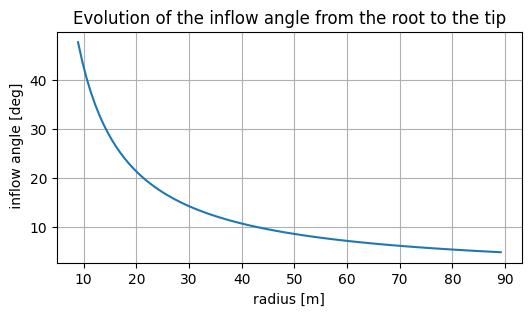

In [116]:
#Inflow angle in along the blade
# data
TSR = 8
B = 3
r = 1
R = 89.17
R_first = 0.1*R         # check value
alpha = 5

radius = np.linspace(R_first, R, num=100)
phi_list =  compute_theta(radius, alpha, TSR, B) + alpha

plt.figure(figsize=(6,3))
plt.title("Evolution of the inflow angle from the root to the tip")
plt.plot(radius, phi_list)
plt.xlabel("radius [m]")
plt.ylabel(" inflow angle [deg]")
plt.grid()
plt.show()

